<a href="https://colab.research.google.com/github/fachiny17/machine_learning/blob/main/deeptech_program_cohort1/mentorship_session/01_mentorship_assignment_intro_to_data_analytics_and_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment Title: Health and Lifestyle Data Analysis**

This dataset captures information about people's demographics, habits, and health factors - all related to lifestyle and disease risk. Visit and download the [dataset](https://www.kaggle.com/datasets/rehan497/health-lifestyle-dataset?resource=download).

In [36]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
url = "https://raw.githubusercontent.com/fachiny17/machine_learning/refs/heads/main/deeptech_program_cohort1/mentorship_session/health_lifestyle_dataset.csv"
data = pd.read_csv(url)

In [38]:
data.head()

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0


In [39]:
# check for missing values
print(data.isnull().sum())

id                   0
age                  0
gender               0
bmi                  0
daily_steps          0
sleep_hours          0
water_intake_l       0
calories_consumed    0
smoker               0
alcohol              0
resting_hr           0
systolic_bp          0
diastolic_bp         0
cholesterol          0
family_history       0
disease_risk         0
dtype: int64


### Find the highest and lowest daily steps

In [40]:
# Highest daily steps
hds = data['daily_steps'].max()
print(f"Highest daily steps: {hds}")

# Lowest daily steps
lds = data['daily_steps'].min()
print(f"Lowest daily steps: {lds}")

Highest daily steps: 19999
Lowest daily steps: 1000


In [41]:
# Details of hughest and lowest daily steps
hds_details = data[data['daily_steps'] == hds]
print("Details of the highest daily steps:")
print(hds_details)

lds_details = data[data['daily_steps'] == lds]
print("\nDetails of the lowest daily steps:")
print(lds_details)

Details of the highest daily steps:
          id  age gender   bmi  daily_steps  sleep_hours  water_intake_l  \
11030  11031   33   Male  19.1        19999          7.5             2.9   
89086  89087   65   Male  18.4        19999          8.3             3.8   
97548  97549   56   Male  19.6        19999          5.4             2.1   

       calories_consumed  smoker  alcohol  resting_hr  systolic_bp  \
11030               1735       0        1          88          156   
89086               2149       0        0          95          102   
97548               1814       0        0          96           93   

       diastolic_bp  cholesterol  family_history  disease_risk  
11030            86          289               1             0  
89086           118          205               0             1  
97548           108          184               1             0  

Details of the lowest daily steps:
          id  age  gender   bmi  daily_steps  sleep_hours  water_intake_l  \
10963

In [46]:
# Aggregate data by age
aggr_age = data.groupby(['age', 'id']).sum().reset_index()
aggr_age.head(5) # to check the first 5

,age,id,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,18,132,Male,32.2,15352,5.3,3.1,2078,0,1,95,155,105,289,0,1
1,18,137,Female,39.0,5108,9.2,4.2,3219,1,0,81,124,95,274,1,0
2,18,173,Female,30.2,15597,3.7,0.8,1850,0,0,95,153,61,271,1,0
3,18,179,Male,37.9,3782,6.5,0.6,3694,0,0,70,100,102,235,0,1
4,18,239,Female,20.3,18384,5.2,2.1,1213,0,1,97,107,68,181,1,1


## How average sleep duration change with age for different disease risk levels?
Is sleep duration affected by both age and health risk?

**Observations:**

`Female's observation:`
* From the graph below, female at their early `40's` and late `50's` have high disease risk because they sleep less.
* Femalkes at `early 20's`, `mid 20's`, and `late 60's` have low disease risk because they have the most sleep hours.

`Male's observations:`
* Male at `late 30's`, `early 40's`, and `mid 50's` have high disease risk because they sleep less.
* Male at `20's`, `early 40's`, `50`, `early 60's`, and `70's` have low disease risk because they sleep more.

`General Observations:`
* **Female** has both the `highest and lowest` disease risk.
* **Male** has `moderate` disease risk.

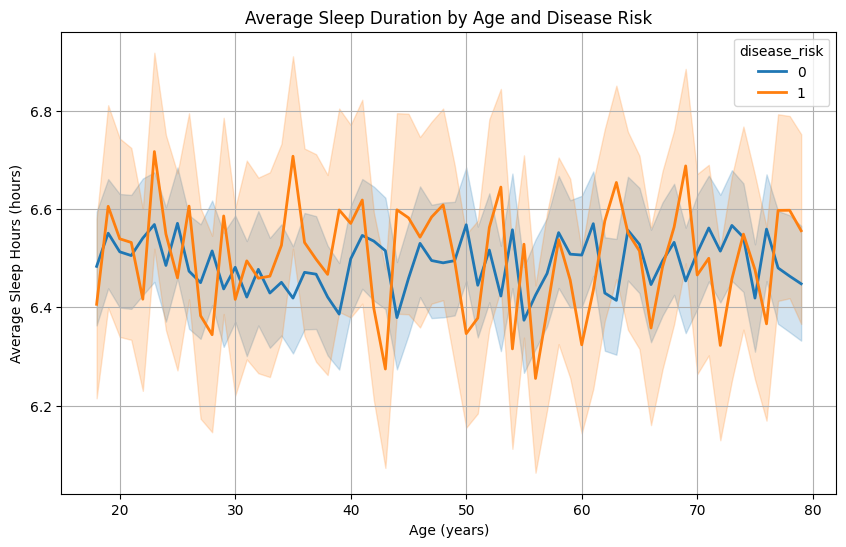

In [72]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='sleep_hours', hue='disease_risk', data=data, lw=2)
plt.title('Average Sleep Duration by Age and Disease Risk')
plt.xlabel('Age (years)')
plt.ylabel('Average Sleep Hours (hours)')
plt.grid(True)
plt.show()

## Bar chart of the average daily steps with respect to gender

### Do daily steps vary signigicantly by gender?
From the bar chart below, the average **daily steps** for both gender is `10000`.

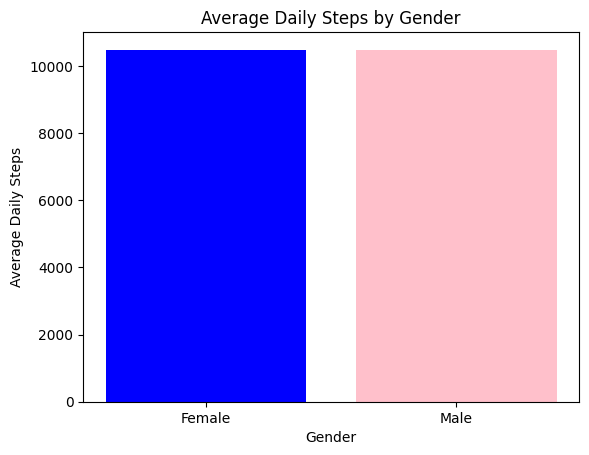

In [50]:
avg_steps = data.groupby('gender')['daily_steps'].mean()

plt.bar(avg_steps.index, avg_steps.values,
        color=['blue', 'pink'])
plt.title('Average Daily Steps by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Daily Steps')
plt.show()

## Pie Chart of Smoking and Alcohol Use
From the chart below:
* `79.9%` of the population are not smoker.
* `20.1%` of the population are not smoker.

* `70.0%` of the population are drunkard.
* `30.0%` of the population are drunkard.

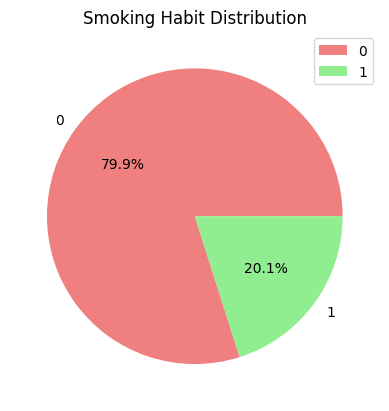

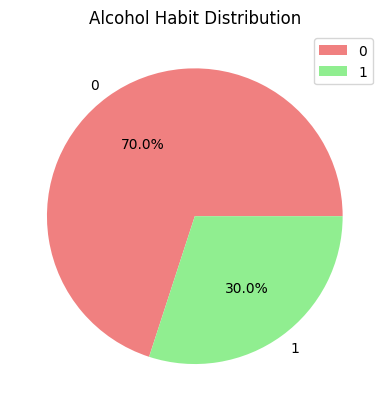

In [59]:
smoke_counts = data['smoker'].value_counts()

plt.pie(smoke_counts,
        labels=smoke_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Smoking Habit Distribution')
plt.legend()
plt.show()

alcohol_counts = data['alcohol'].value_counts()
plt.pie(alcohol_counts,
        labels=alcohol_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Alcohol Habit Distribution')
plt.legend()
plt.show()

## How does average sleep duration change across disease risk levels?

The green bar represents low disease risk, while the yellow bar represents high disease risk.

From the bar chart, both high and low disease risk has almost/same sleeping hours on average. **Hence**, sleeping hour may not significantly affect the disease risk.

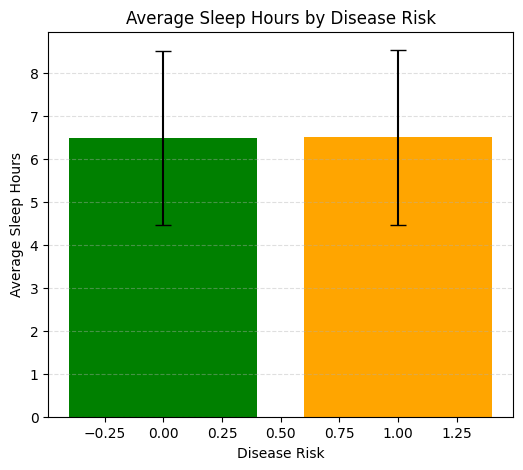

In [60]:
risk_groups = data.groupby('disease_risk')['sleep_hours']
means = risk_groups.mean()
stds = risk_groups.std()

plt.figure(figsize=(6,5))
plt.bar(means.index, means.values, yerr=stds.values, color=['green', 'orange', 'red'],
        capsize=6)
plt.title('Average Sleep Hours by Disease Risk')
plt.xlabel('Disease Risk')
plt.ylabel('Average Sleep Hours')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

## How does average BMI change with age across genders?
Do men and women show different BMI trends as they age?

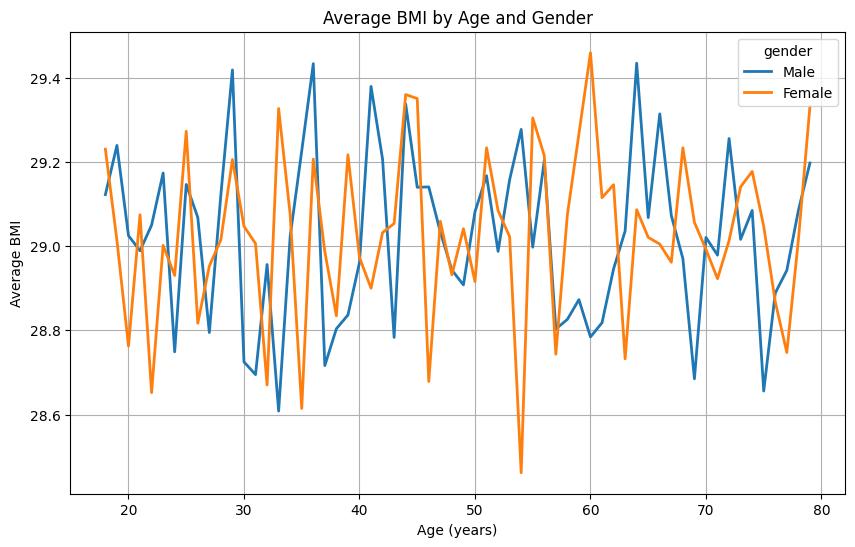

In [68]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x='age', y='bmi', hue='gender', errorbar=None, lw=2)
plt.title('Average BMI by Age and Gender')
plt.xlabel('Age (years)')
plt.ylabel('Average BMI')
plt.grid(True)
plt.show()